In [45]:
import pandas
import nibabel as ni
import numpy as np
import networkx as nx
import seaborn as sns
from glob import glob
from sklearn import cluster
import matplotlib.pyplot as plt

In [3]:
tst_el = '../data/graphs/BNU1/hippo_erc_voxelwise/sub-0025864_ses-1_dwi_hippo_erc_voxelwise.edgelist'
jnk = nx.read_weighted_edgelist(tst_el)

In [115]:
tbl = pandas.read_table(tst_el, sep=' ', header=None)
tbl.columns = ['x','y','value']
full_mtx = np.zeros((9877, 9877))
full_mtx.shape
for i,row in tbl.iterrows():
    full_mtx[row['x'], row['y']] = row['value']

In [117]:
bin_matrix = np.zeros_like(full_mtx)
bin_matrix[bin_matrix > 0] = 1

In [118]:
len(bin_matrix>0) / len(bin_matrix.flat)

0.00010124531740407007

In [51]:
cluster.SpectralClustering?

In [100]:

atlas = ni.load('../data/dilated_hipp_parcellation_gspace.nii.gz').get_data()
vw = ni.load('../data/hippo_erc_voxelwise.nii.gz').get_data()


In [104]:
len(np.unique(ec_indices)) + len(np.unique(hipp_indices))

9877

In [120]:
#full_mtx = np.zeros((len(np.unique(vw)), len(np.unique(vw))))

hipp_indices = vw[atlas>2]
ec_indices = vw[(atlas==1) | (atlas==2)]

newmat = np.zeros((len(hipp_indices), len(ec_indices)))

for i, hipind in enumerate(hipp_indices):
    for j, ecind in enumerate(ec_indices):
        newmat[i,j] = bin_matrix[hipind-1, ecind-1]

In [121]:
newmat.shape

(8719, 1158)

In [144]:
SC = cluster.SpectralClustering(n_clusters=2, n_neighbors=100, assign_labels='discretize')
test_SC = SC.fit(newmat)

In [125]:
list(zip(np.unique(test_SC.labels_),np.bincount(test_SC.labels_)))

[(0, 7027), (1, 1692)]

In [135]:
hip_remap = {i: hipind for i,hipind in enumerate(hipp_indices)}
    
erc_remap = {i: ecind for i,ecind in enumerate(ec_indices)}

In [145]:
cx_clusters = np.zeros_like(vw)
for idx, label in enumerate(test_SC.labels_):
    cx_clusters[vw == hip_remap[idx]] = label+1 

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


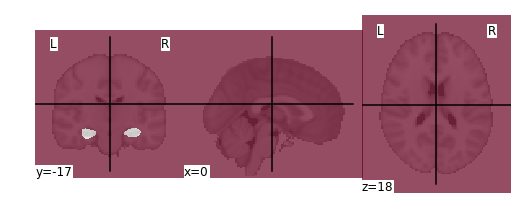

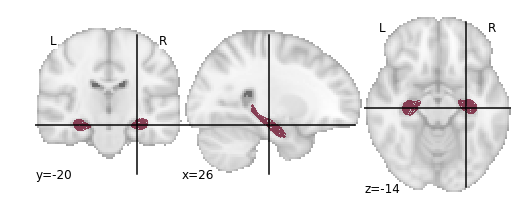

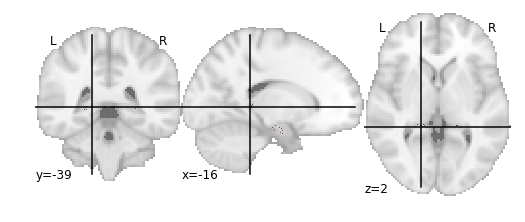

In [146]:
#from nilearn import plotting
#aff = ni.load('../data/dilated_hipp_parcellation_gspace.nii.gz').affine
for val in np.unique(cx_clusters):
    jnk = np.zeros_like(cx_clusters)
    jnk[cx_clusters==val] = 1
    plt.close()
    plotting.plot_roi(ni.Nifti1Image(jnk, aff), cmap='RdBu')
    plt.show()
    


In [36]:
d = tst_mtx.shape[0] # dimensionality -- number of nodes
n = 1  # number of graphs
delta = n**(-1./(d+4))

In [37]:
dist_matrix = tst_mtx
similarity_matrix = np.exp(- dist_matrix ** 2 / (2. * delta ** 2))

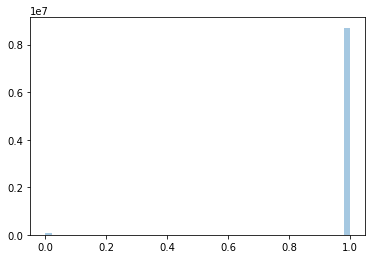

In [47]:
sns.distplot(similarity_matrix.flat, kde=False)
plt.show()